In [205]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Conectar a la base de datos

In [206]:
import psycopg2
import os
from dotenv import load_dotenv

load_dotenv()
# Configura los parámetros de la conexión

db_host = os.getenv("DB_HOST_AWS")
db_username = os.getenv("DB_USER_AWS")
db_password = os.getenv("DB_PASSWORD_AWS")
db_database = os.getenv("DB_DATABASE_AWS")
db_port = int(os.getenv("DB_PORT_AWS", 5432))


# Establecer la conexión
try:
    connection = psycopg2.connect(host=db_host,
                                  database=db_database,
                                  user=db_username,
                                  password=db_password,
                                  port=db_port,
                                  sslmode="require")
    
    print("Conexión exitosa a la base de datos PostgreSQL con SSL")

except psycopg2.OperationalError as e:
    print("Error de conexión:", e)
except Exception as error:
    print("Error desconocido:", error)

Conexión exitosa a la base de datos PostgreSQL con SSL


In [207]:
# Escribe la consulta SQL
query = "SELECT * FROM sociosanitarios_data"
# Usa pandas para ejecutar la consulta y convertirla en un DataFrame
df_4 = pd.read_sql_query(query, connection)

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_33140\2175698640.py:4: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [208]:
df_4

,sociosanitario_id,ciudad,ambito_laboral,especialidad
0,1,Salamanca,Asociación,Trabajador social
1,2,Zaragoza,Hospitalario,Trabajador social
2,3,Barcelona,Centro de salud,Voluntario
3,4,A Coruña,Asociación,Voluntario
4,5,Madrid,Asociación,Trabajador social
5,6,Valencia,Hospitalario,Voluntario
6,7,Toledo,Hospitalario,Especialista en ETS


In [209]:
# Escribe la consulta SQL
query = "SELECT * FROM preguntas"
# Usa pandas para ejecutar la consulta y convertirla en un DataFrame
df_1 = pd.read_sql_query(query, connection)


C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_33140\4261430220.py:4: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [210]:
df_1

,pregunta_id,texto


In [211]:
# Escribe la consulta SQL
query = "SELECT * FROM admin_data"

# Usa pandas para ejecutar la consulta y convertirla en un DataFrame
df_2 = pd.read_sql_query(query, connection)

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_33140\3716890679.py:5: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [212]:
df_2

,admin_id,user_name,password


In [213]:
# Escribe la consulta SQL
query = "SELECT * FROM user_data"

# Usa pandas para ejecutar la consulta y convertirla en un DataFrame
df_3 = pd.read_sql_query(query, connection, index_col="user_id")

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_33140\3165462258.py:5: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [214]:
df_3

,edad,pronombres,genero,orientacion,vives_espana,pais,permiso_residencia,persona_racializada,discapacitade,sin_hogar,migrante,intersexual
user_id,,,,,,,,,,,,
1,20,el,hombre_cis,gay,True,espana,None,True,False,True,True,None
2,35,elle,otro,bisexual,False,espana,None,False,True,True,False,None
3,42,ella,mujer_cis,lesbiana,True,colombia,con_permiso_de_residencia,True,True,True,True,None
4,61,elle,no_binarie,pansexual,False,ecuador,en_tramite_de_permiso_de_residencia,False,False,False,False,None
5,55,el,hombre_cis,asexual,True,venezuela,otros,True,False,True,False,None
6,27,el,hombre_trans,otro,False,portugal,de_vacaciones,True,False,True,True,None
7,31,ella,mujer_trans,heterosexual,True,marruecos,con_permiso_de_residencia,False,True,True,False,None


In [215]:
print(list(df_3.columns))

['edad', 'pronombres', 'genero', 'orientacion', 'vives_espana', 'pais', 'permiso_residencia', 'persona_racializada', 'discapacitade', 'sin_hogar', 'migrante', 'intersexual']


In [216]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 1 to 7
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   edad                 7 non-null      int64 
 1   pronombres           7 non-null      object
 2   genero               7 non-null      object
 3   orientacion          7 non-null      object
 4   vives_espana         7 non-null      bool  
 5   pais                 7 non-null      object
 6   permiso_residencia   5 non-null      object
 7   persona_racializada  7 non-null      bool  
 8   discapacitade        7 non-null      bool  
 9   sin_hogar            7 non-null      bool  
 10  migrante             7 non-null      bool  
 11  intersexual          0 non-null      object
dtypes: bool(5), int64(1), object(6)
memory usage: 483.0+ bytes


# Crear Grafico

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_33140\1595709225.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_33140\1595709225.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




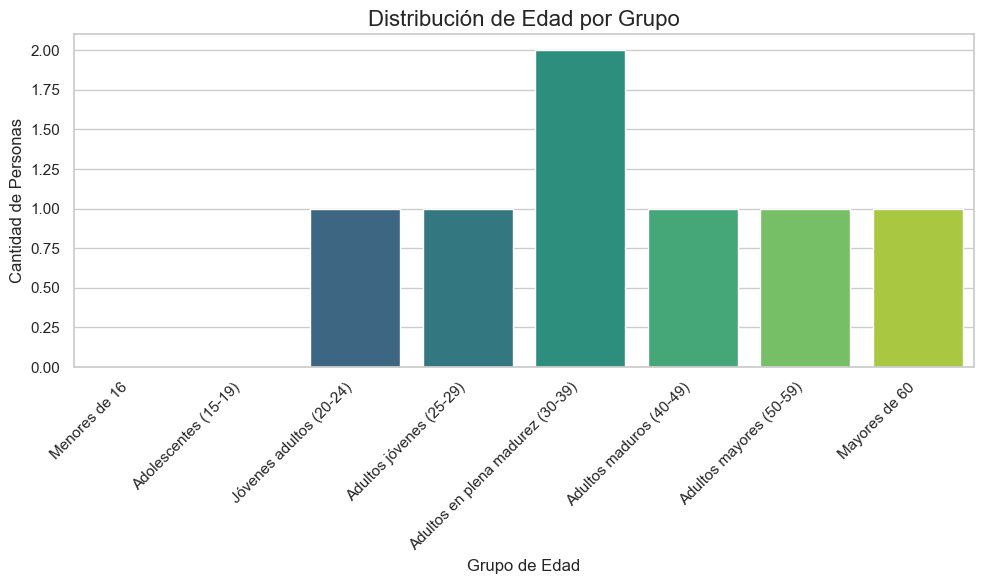

In [217]:
bins = [0, 15, 19, 24, 29, 39, 49, 59, 100]
labels = ['Menores de 16', 'Adolescentes (15-19)', 'Jóvenes adultos (20-24)', 
          'Adultos jóvenes (25-29)', 'Adultos en plena madurez (30-39)', 
          'Adultos maduros (40-49)', 'Adultos mayores (50-59)', 'Mayores de 60']

# Crear una nueva columna 'grupo_edad' con las categorías
df_3['grupo_edad'] = pd.cut(df_3['edad'], bins=bins, labels=labels, right=False)

# Contar la cantidad de personas en cada grupo de edad
edad_grupo = df_3.groupby('grupo_edad').size().reset_index(name='cantidad')

# Configuración de visualización
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='grupo_edad', y='cantidad', data=edad_grupo, palette="viridis")

# Personalización del gráfico
plt.title('Distribución de Edad por Grupo', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Cantidad de Personas', fontsize=12)
plt.xticks(rotation=45, ha='right') 

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [218]:
df_3

,edad,pronombres,genero,orientacion,vives_espana,pais,permiso_residencia,persona_racializada,discapacitade,sin_hogar,migrante,intersexual,grupo_edad
user_id,,,,,,,,,,,,,
1,20,el,hombre_cis,gay,True,espana,None,True,False,True,True,None,Jóvenes adultos (20-24)
2,35,elle,otro,bisexual,False,espana,None,False,True,True,False,None,Adultos en plena madurez (30-39)
3,42,ella,mujer_cis,lesbiana,True,colombia,con_permiso_de_residencia,True,True,True,True,None,Adultos maduros (40-49)
4,61,elle,no_binarie,pansexual,False,ecuador,en_tramite_de_permiso_de_residencia,False,False,False,False,None,Mayores de 60
5,55,el,hombre_cis,asexual,True,venezuela,otros,True,False,True,False,None,Adultos mayores (50-59)
6,27,el,hombre_trans,otro,False,portugal,de_vacaciones,True,False,True,True,None,Adultos jóvenes (25-29)
7,31,ella,mujer_trans,heterosexual,True,marruecos,con_permiso_de_residencia,False,True,True,False,None,Adultos en plena madurez (30-39)


In [219]:
df_3["genero"].value_counts()

genero
hombre_cis      2
otro            1
mujer_cis       1
no_binarie      1
hombre_trans    1
mujer_trans     1
Name: count, dtype: int64

# Grafico 1: 
## Representación de Orientación por nacionalidad

In [220]:
import plotly.express as px

In [221]:
def crear_grafico_pie(dataframe, viven_espana=True):

    #Filtro para el DataFrame
    filtro = dataframe['vives_espana'] == viven_espana
    df_filtrado = dataframe[filtro]
    
    #Conteo de orientaciones
    colectivos_count = df_filtrado['orientacion'].value_counts().reset_index()
    colectivos_count.columns = ['Orientacion', 'Cantidad']
    
    #Tener en cuenta ambas posibilidades
    titulo = "Distribución de Orientación Sexual"
    if viven_espana:
        titulo += " (Personas que Viven en España)"
    else:
        titulo += " (Personas que No Viven en España)"
    
    fig = px.pie(colectivos_count, 
                 values='Cantidad', 
                 names='Orientacion', 
                 title=titulo,
                 color_discrete_sequence=px.colors.qualitative.Pastel)
    
    return fig


fig = crear_grafico_pie(df_3, viven_espana=True)
fig.show()

In [222]:
fig = crear_grafico_pie(df_3, viven_espana=False)
fig.show()


# Grafico 2:
## Orientacio y genero

In [223]:
def barras_apiladas_genero_orientacion(dataframe):

    # Agrupar y contar las combinaciones de género y orientación
    datos_agrupados = dataframe.groupby(['genero', 'orientacion']).size().reset_index(name='Cantidad')
    
    #Comfigurar el Gráfico
    fig = px.bar(datos_agrupados,
                 x='genero',
                 y='Cantidad',
                 color='orientacion',
                 title='Distribución de Género y Orientación Sexual',
                 labels={'genero': 'Género', 'orientacion': 'Orientación Sexual'},
                 barmode='stack',  
                 color_discrete_sequence=px.colors.qualitative.Pastel)
    
    return fig


In [224]:
fig = barras_apiladas_genero_orientacion(df_3)
fig.show()

In [225]:
import plotly.express as px

def graficar_combinaciones(df_3):
    
    #Agrupación y conteo:
    combinaciones = df_3.groupby(['persona_racializada', 'discapacitade', 'sin_hogar', 'migrante']).size().reset_index(name='Cantidad')
    
    #Agrupar por columnas:
    combinaciones['Combinación'] = combinaciones.apply(
        lambda row: f"Racializada: {row['persona_racializada']}, Discapacidad: {row['discapacitade']}, "
                    f"Hogar: {row['sin_hogar']}, Migrante: {row['migrante']}", axis=1)
    
    #Configuración gráfico de barras:
    fig = px.bar(combinaciones, 
                 x='Combinación', 
                 y='Cantidad', 
                 title='Frecuencia de Combinaciones de Condiciones',
                 labels={'Combinación': 'Combinación de Condiciones', 'Cantidad': 'Número de Personas'},
                 color='Cantidad',
                 color_continuous_scale='Viridis')

    #Etiquetas
    fig.update_layout(xaxis_tickangle=45)
    fig.show()





In [226]:
graficar_combinaciones(df_3)

# Permisos de residencia
## Conteo de Valores

In [227]:
import plotly.express as px

def graficar_permiso_residencia(df_3):
    # Contar las frecuencias de los valores en la columna 'permiso_residencia'
    permiso_count = df_3['permiso_residencia'].value_counts().reset_index()
    permiso_count.columns = ['Permiso de Residencia', 'Cantidad']
    
    #Calcular los porcentajes
    total = permiso_count['Cantidad'].sum()
    permiso_count['Porcentaje'] = (permiso_count['Cantidad'] / total) * 100
    
    #Calcular el índice de la sección con el valor más grande
    max_value_index = permiso_count['Cantidad'].idxmax()
    
    #Crear un vector donde la porción con el valor más grande será destacada
    pull_values = [0 if i != max_value_index else 0.1 for i in range(len(permiso_count))]
    
    # Crear gráfico de pastel (pie chart) con cantidades y porcentajes
    fig = px.pie(permiso_count, 
                 names='Permiso de Residencia', 
                 values='Cantidad', 
                 title='Distribución de Permisos de Residencia',
                 labels={'Permiso de Residencia': 'Tipo de Permiso'},
                 color='Permiso de Residencia',
                 color_discrete_sequence=px.colors.qualitative.Set1,
                 hole=0.3)  # Pie chart con un agujero en el centro (para hacerlo tipo donut)
    
    # Añadir texto de porcentajes y cantidades dentro del gráfico
    fig.update_traces(pull=pull_values)
    
    fig.show()
# 

In [228]:
graficar_permiso_residencia(df_3)